In [1]:
import sys
sys.path.append('../scripts')

import numpy as np
import pandas as pd

from yahoo_stock_data import YahooStockData
from data_handler import DataHandler
from arma import AlgoARMA

In [2]:
START_DATE = '2000-01-01'
TARGET     = 'High'
TIMEFRAME  = -1
LOG_RETURN = True
TEST_SIZE  = 0.2

ticker = 'MSFT'

si_from_yahoo = YahooStockData(ticker)
si_data = si_from_yahoo.get_data(START_DATE)
si_data.reset_index(inplace=True)
# si_data.to_csv('MSFT.csv', index=False)
# si_data = pd.read_csv('MSFT.csv')

[*********************100%***********************]  1 of 1 completed


In [3]:
data_handler = DataHandler(si_data, TARGET, TIMEFRAME, LOG_RETURN, TEST_SIZE)
# data_handler.pacf_acf_plots()
algo_arma = AlgoARMA(data_handler.y_train, 2, 1) # AR(p), MA(q)
forecasts = algo_arma.get_forecasts(len(data_handler.y_val) + len(data_handler.y_test))

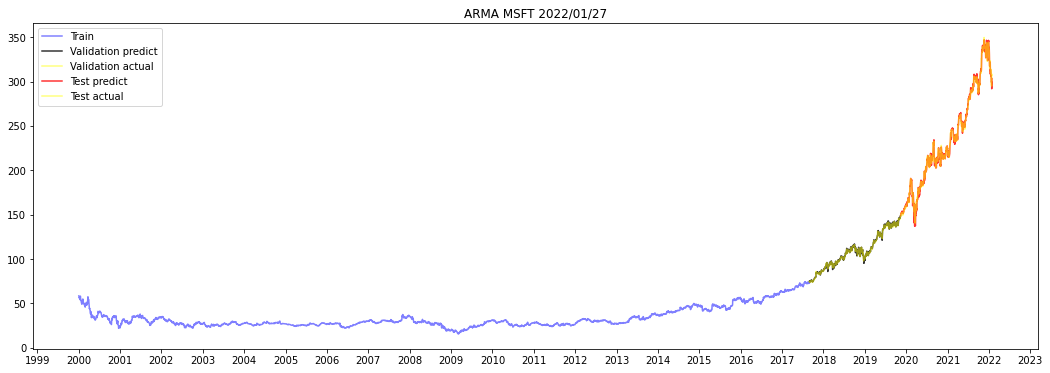


Predicted value: 303.323581949675


,mse,mae,rmse,mape
Test Results,10.63571,2.344608,3.261244,0.010598


In [4]:
forecast, val_results, test_results = data_handler.process_forecasts(forecasts, plot_title=f'ARMA {ticker}')
print()
print("Predicted value:", forecast[-1])
pd.DataFrame(test_results, index=['Test Results'])